# Inria dataset: dataset: Example of the `aitlas` toolbox for image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [1]:
from aitlas.datasets import InriaDataset
from aitlas.models import DeepLabV3
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTransponse

## Visualize images and masks

Total number of patches: 18000


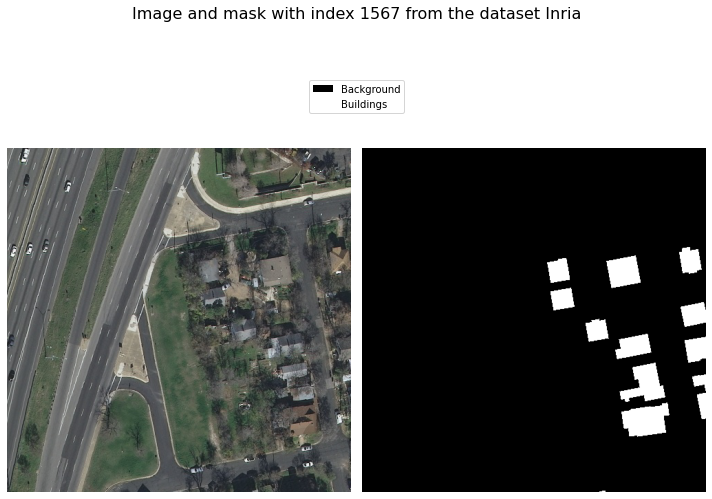

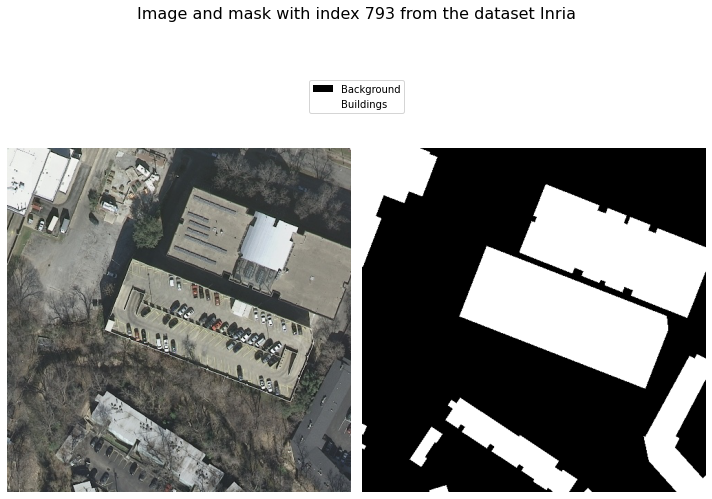

In [2]:
dataset_config = {
    "data_dir": "/media/hdd/semantic-segmentation/inria/data",
    "csv_file": "/media/hdd/semantic-segmentation/inria/train.txt"
}
dataset = InriaDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1567);
dataset.show_image(793);

## Load train data

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/hdd/semantic-segmentation/inria/data",
    "csv_file": "/media/hdd/semantic-segmentation/inria/train.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.Transponse"]
}
train_dataset = InriaDataset(train_dataset_config)
len(train_dataset)

18000

## Create the model

In [4]:
epochs = 5
model_directory = "./experiments/inria"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [ ]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

## Predictions

2021-12-05 22:04:55,102 INFO Loading checkpoint ./experiments/inria/checkpoint.pth.tar
2021-12-05 22:04:55,528 INFO Loaded checkpoint ./experiments/inria/checkpoint.pth.tar at epoch 101


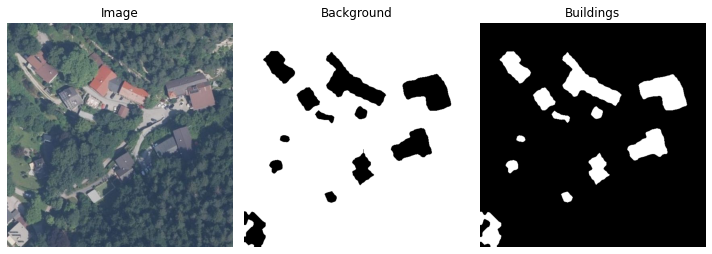

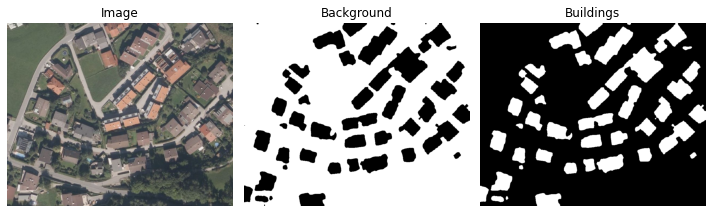

In [7]:
model_path = "./experiments/inria/checkpoint.pth.tar"
model = DeepLabV3(model_config)
model.prepare()
#labels = InriaDataset.labels
labels = ["Background", "Buildings"]
transform = MinMaxNormTransponse()
model.load_model(model_path)

image = image_loader('./experiments/inria/tyrol-e20_1.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('./experiments/inria/innsbruck36_1.jpg')
fig = model.predict_masks(image, labels, transform)